In [45]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
import scipy.stats as levene
import scipy.stats as f_oneway
import scipy.stats as pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [46]:
data = pd.read_csv('striker_performace.csv')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


DATA_CLEANING

In [47]:
data.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [48]:
impute = SimpleImputer(strategy='median')
data[['Movement off the Ball',
      'Big Game Performance',
      'Penalty Success Rate']] = impute.fit_transform(data[['Movement off the Ball',
                                                            'Big Game Performance',
                                                            'Penalty Success Rate']])
data.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

DATA_TYPES

In [49]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [50]:
Wrong_dtype = ['Goals Scored',
               'Assists',
               'Shots on Target',
               'Movement off the Ball',
               'Hold-up Play',
               'Aerial Duels Won',
               'Defensive Contribution',
               'Big Game Performance',
               'Impact on Team Performance',
               'Off-field Conduct']

for var in Wrong_dtype:
    data[var] = data[var].astype('int')
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [51]:
data.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6


In [52]:
num_data = round(data.describe(),2)

In [53]:
num_data.head()


,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00


In [54]:
freq_foot = data['Footedness'].value_counts()
percentage_freq_foot = freq_foot/len(data['Footedness'])*100
percentage_freq_foot

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

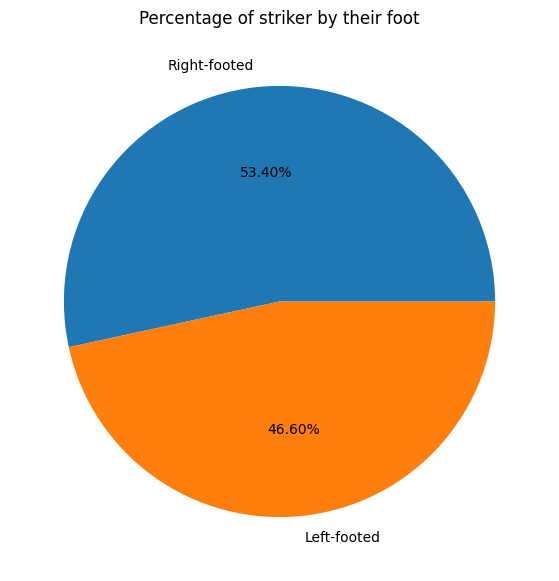

In [55]:
plt.figure(figsize=(13,7))
percentage_freq_foot.plot(kind='pie' ,autopct='%1.2f%%')
plt.title('Percentage of striker by their foot')
plt.ylabel('')
plt.show()

Which nationality strikers have the highest average number of goals scored

In [56]:
goals_by_nation = data.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False)
round(goals_by_nation,2)

Nationality
Brazil     15.32
Spain      14.69
France     14.41
Germany    14.35
England    13.90
Name: Goals Scored, dtype: float64

What is the average conversion rate for left-footed player?

In [57]:
conversion_rate_for_lefty = data.groupby('Footedness')['Conversion Rate'].mean()
conversion_rate_for_lefty

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

Distribution of players footedness based on nationality

In [58]:
main_foot_nationality = pd.crosstab(data['Nationality'],data['Footedness'])
main_foot_nationality

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


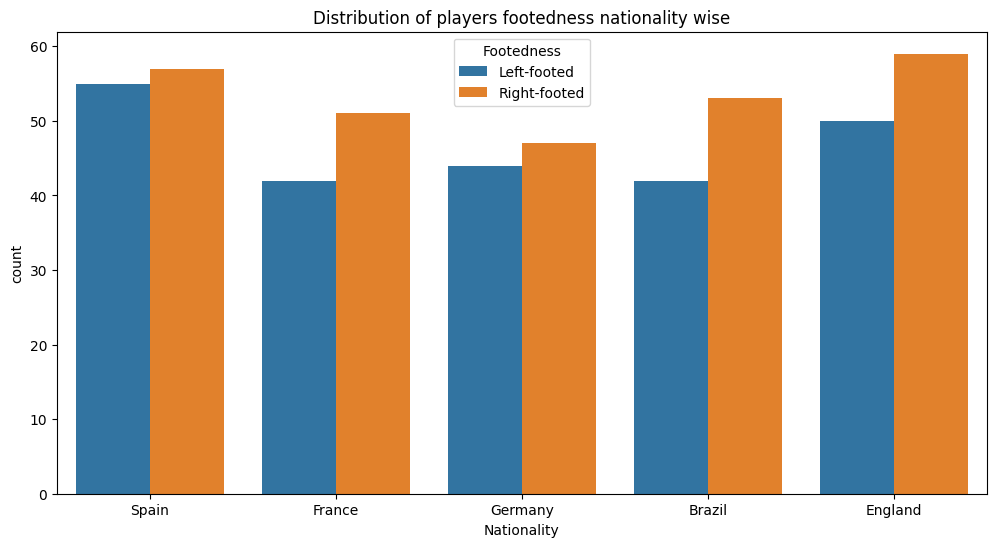

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='Nationality',hue='Footedness',data=data)
plt.title("Distribution of players footedness nationality wise")
plt.xlabel('Nationality')
plt.ylabel('count')
plt.show()

In [60]:
num_data.head()

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00


Correlation with heat map

In [61]:
num_var = data.select_dtypes(include='number').columns
correl_matrix = round(data[num_var].corr(),3)
correl_matrix

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.011,0.026,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.011,0.039,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.027,-0.019,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.002,0.037,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060
Movement off the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.006,-0.075,-0.030,-0.071,-0.046,-0.035
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.029,-0.031,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.025,-0.013,0.047,-0.002,0.043,0.004


<function matplotlib.pyplot.show(close=None, block=None)>

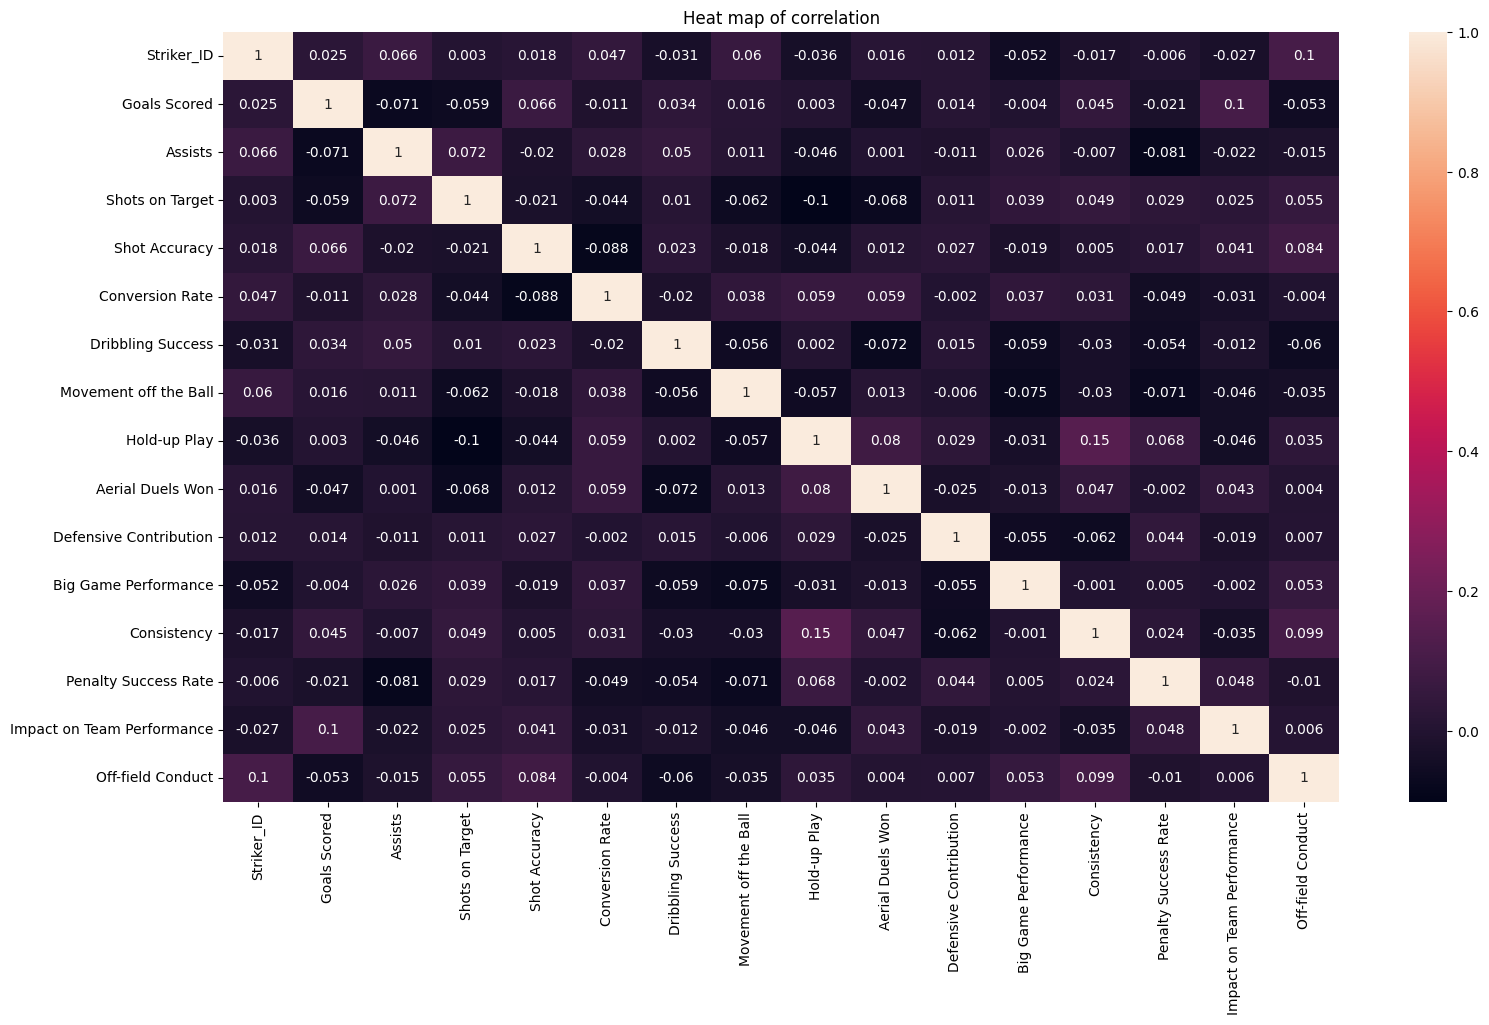

In [62]:
plt.figure(figsize=(18,10))
sns.heatmap(correl_matrix,annot=True)
plt.title('Heat map of correlation')
plt.show

In [63]:
stat, p_valie = shapiro(data['Consistency'])
print("P value ",round(p_valie,3))

P value  0.451


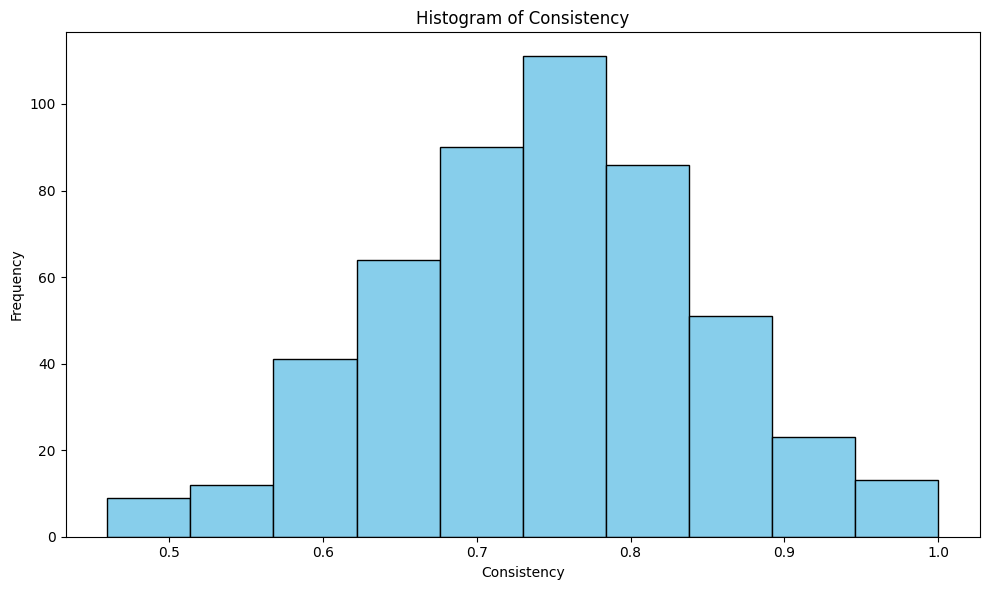

In [64]:
plt.figure(figsize=(10,6))
plt.hist(data['Consistency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Consistency')
plt.xlabel('Consistency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [65]:
data['Nationality'].unique()

array(['Spain', 'France', 'Germany', 'Brazil', 'England'], dtype=object)

In [66]:
Spain = data.query('Nationality == "Spain"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']
Spain   

0      0.820314
10     0.763556
14     0.869553
16     0.800458
19     0.599713
         ...   
469    0.690776
476    0.915331
481    0.912326
488    0.793494
492    0.650169
Name: Consistency, Length: 112, dtype: float64

In [67]:
Stats, p_value = stats.levene(Spain, France, Germany, Brazil, England)
print("Stast: ",Stats)
print("P_value: ", round(p_value,2))

Stast:  0.4003865092065383
P_value:  0.81


In [68]:
Stats, p_value = stats.f_oneway(Spain,France,Germany,Brazil,England)
print("Stats: ",round(Stats,2))
print("p_value: ",round(p_value,2))

Stats:  1.53
p_value:  0.19


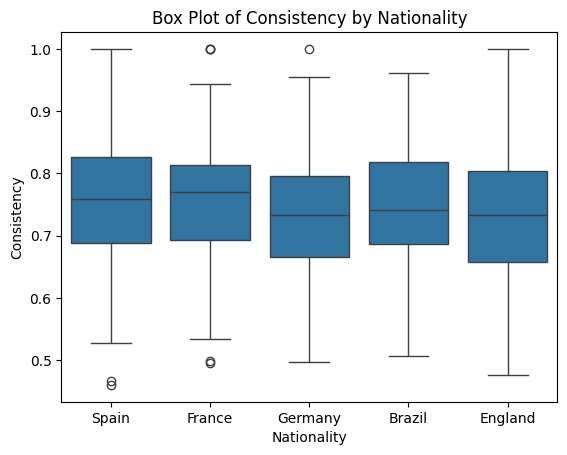

In [69]:
sns.boxplot(x='Nationality', y='Consistency', data=data)
plt.title('Box Plot of Consistency by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Consistency')
plt.show()

Checking for correlation between strikers hold up play

In [70]:
#normality test
stat, p_value = shapiro(data['Hold-up Play'])
print("stats value: ", stat)
print("P_value: ", p_value)

stats value:  0.9954325275369145
P_value:  0.15094090394128723


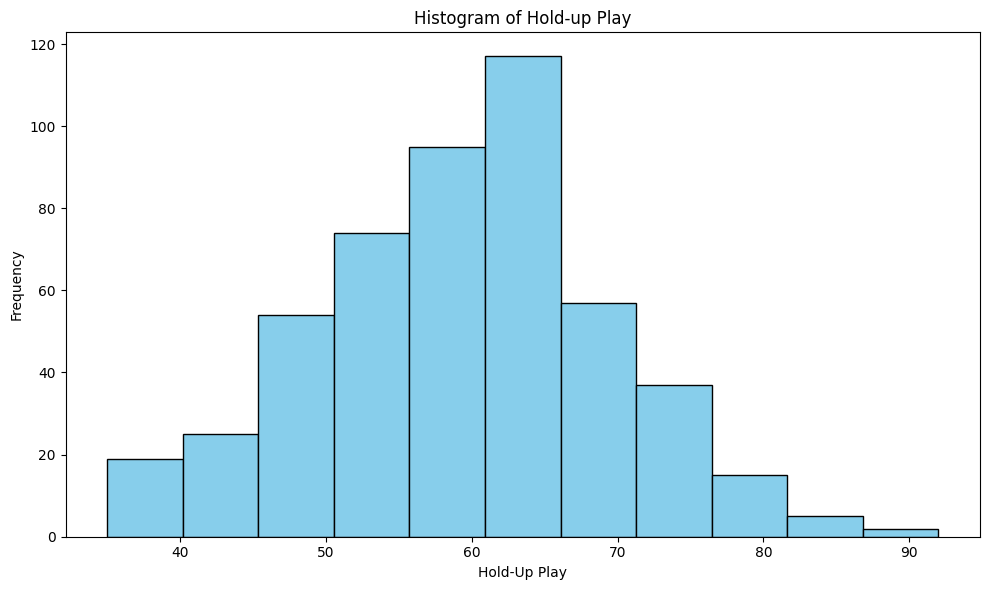

In [71]:
plt.figure(figsize=(10,6))
plt.hist(data['Hold-up Play'], bins=11, color='skyblue', edgecolor='black')
plt.title('Histogram of Hold-up Play')
plt.xlabel('Hold-Up Play')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

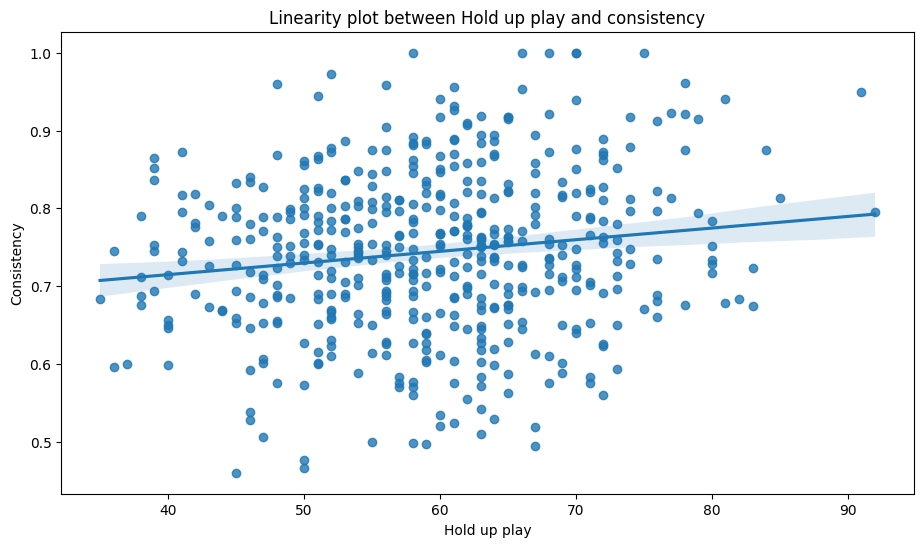

In [72]:
#linearity test
plt.figure(figsize=(11,6))
sns.regplot(x='Hold-up Play', y='Consistency', data=data)
plt.title("Linearity plot between Hold up play and consistency")
plt.xlabel("Hold up play")
plt.ylabel("Consistency")
plt.show

In [73]:
#Doing a pearson correlation
hup = data['Hold-up Play']
cons = data['Consistency']
corr, p_value = stats.pearsonr(hup, cons)
print("corr: ", round(corr,3))
print("P_value: ", round(p_value,3))
#if p_value < 0.05 means the  There's strong evidence that the correlation you observed is genuine and not due to random events or noise.
#if p-value >= 0.05: The correlation might not be significant, and it could be due to random variations (like a few extreme values).

corr:  0.147
P_value:  0.001


check if striker's hold up play influence consistency

In [74]:
x = data['Hold-up Play']
y = data['Consistency']

x_constant = sm.add_constant(x)
model = sm.OLS(y,x_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00101
Time:                        16:30:29   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

Feature engineering

In [75]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [76]:
data['Total_contribution'] = (data['Goals Scored'] + data['Assists'] + data['Shots on Target'] + data['Dribbling Success'] + data['Big Game Performance'] + data['Aerial Duels Won'] + data['Consistency'] + data['Defensive Contribution'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [77]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [78]:
encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [81]:
dummies = pd.get_dummies(data['Nationality'])
processed_df = pd.concat([data,dummies],axis=1)
processed_df = processed_df.drop('Nationality',axis=1)
processed_df.head()
#axis is to decide column or rows like 1 is for column and 0 is for rows

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution,Brazil,England,France,Germany,Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,False,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,False,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,False,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,False,False,True,False,False
